In [ ]:
import torch
import fastai

In [ ]:
import fastai 
fastai.__version__

'2.7.12'

In [ ]:
torch.__version__

'2.0.0+cu118'

In [ ]:
#!git clone http://github.com/EscVM/OIDv4_ToolKit.git
!cd OIDv4_ToolKit && pip install -r requirements.txt

In [ ]:
!cd OIDv4_ToolKit && python main.py -h

In [ ]:
!cd OIDv4_ToolKit && python3 main.py downloader --Dataset /content --classes Car Airplane Boat --type_csv train --limit 200


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Car.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...145%, 0 MB, 37137 KB/s, 0 seconds passed
[DOWNLOAD] | File clas

## BUILDING MODEL

In [ ]:
from fastai.vision.all import *
from ipywidgets import widgets

#path
path=Path('train')
#fls=get_image_files(path)
#failed=verify_images(path)
# DAtablock create
transports=DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)
)
#dataloaders
dls=transports.dataloaders(path)
#datasetni tekshirish
#dls.train.show_batch(max_n=32,nrows=4)
#O'qitish (TRAIN)
learn=cnn_learner(dls,resnet34,metrics=accuracy)
learn.fine_tune(4)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593

epoch,train_loss,valid_loss,accuracy,time
0,1.377922,0.265620,0.916667,02:56


epoch,train_loss,valid_loss,accuracy,time
0,0.444847,0.269074,0.916667,04:02
1,0.312012,0.321713,0.933333,03:58
2,0.231043,0.301522,0.925000,04:09
3,0.181870,0.306494,0.925000,04:03


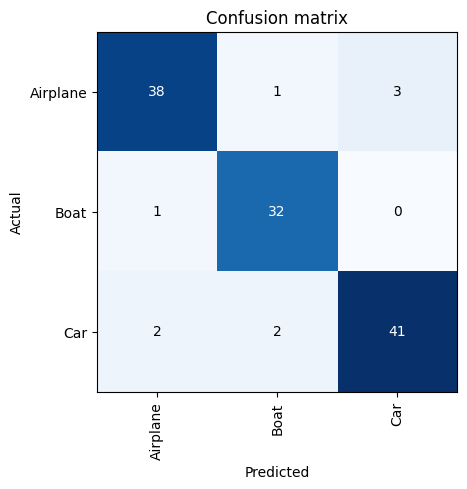

In [ ]:
# tekshirish
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

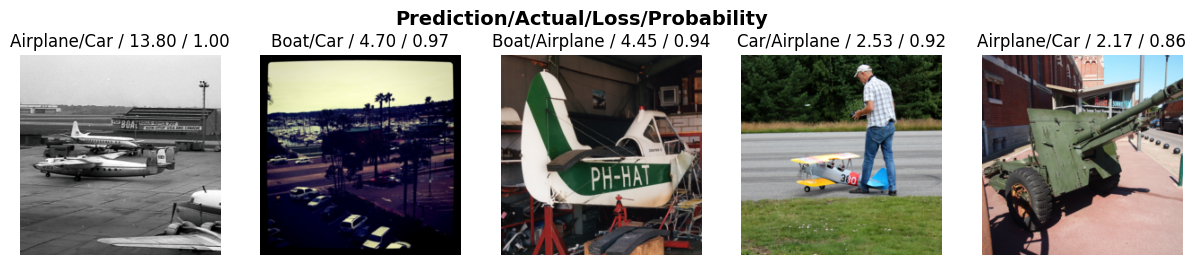

In [ ]:
interp.plot_top_losses(5,nrows=1)

In [ ]:
from ipywidgets import widgets
upload=widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

BAshorat:Boat
Ehtimollik:90.2%


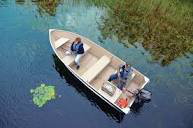

In [ ]:
img=PILImage.create(upload.data[-1])
pred, pred_id, probs=learn.predict(img)
print(f"BAshorat:{pred}")
print(f"Ehtimollik:{probs[pred_id]*100:.1f}%")
img

In [ ]:
learn.export('transport_model.pkl')

In [ ]:
model=load_learner("/content/transport_model.pkl")

In [ ]:
model.predict(img)


('Boat', tensor(1), tensor([0.0018, 0.9024, 0.0959]))